In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_Cleaned.csv',)
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
df.columns

Index(['Unnamed: 0', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
df = df.drop(['Unnamed: 0', 'day', 'month', 'year'], axis = 1)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [9]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [10]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


# Model Traing

In [14]:
x = df.drop('FWI', axis= 1)
y = df['FWI']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size= 0.25, random_state= 42)

In [17]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [18]:
## Feature Selection based on correlaltion
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [34]:
#Setting the multicollinearity threshold
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [35]:
corr_features = correlation(X_train, 0.85)

In [36]:
X_train.drop(corr_features, axis=1, inplace= True)
X_test.drop(corr_features, axis=1, inplace= True)

In [37]:
X_train.shape, X_test.shape

((182, 9), (61, 9))

In [38]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19.0,0.1,75.8,3.6,2.1,0,0
141,31,72,14.0,0.2,60.2,3.8,0.8,0,1
192,40,31,15.0,0.0,94.2,22.5,16.6,1,1
68,32,60,18.0,0.3,77.1,11.3,2.2,0,0
119,32,47,14.0,0.7,77.5,7.1,1.8,0,0


# Standardization

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [41]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

## Boxplot to understanding the Effect of Standard Scaler

Text(0.5, 1.0, 'X_train After Scaling')

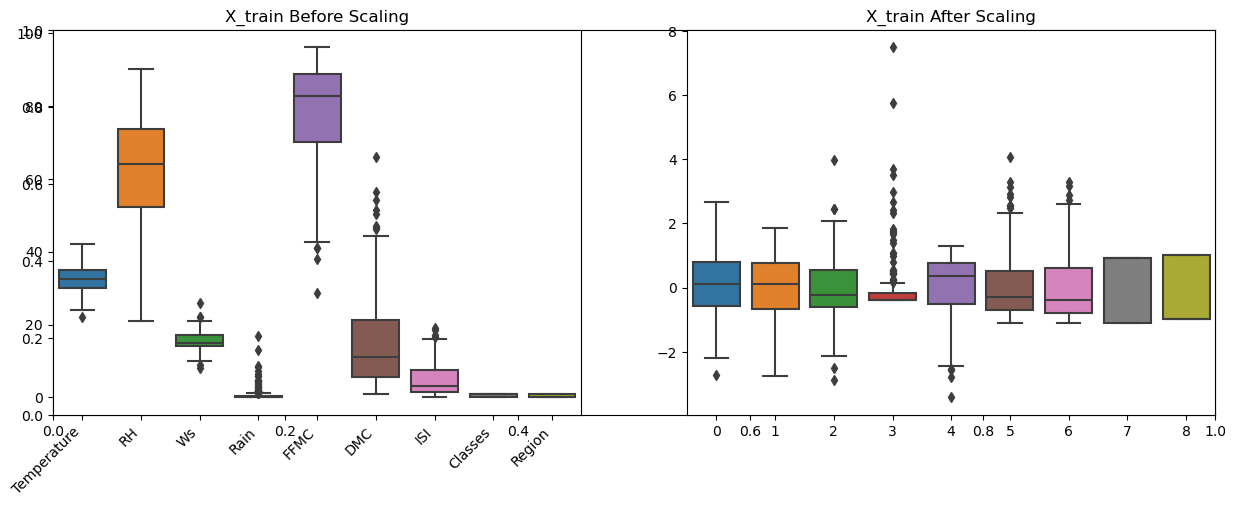

In [55]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.xticks(rotation=45, ha='right')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

# Linear Model

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()

Mean absolute error 0.9939450225331418
R2 Score 0.960705665786065


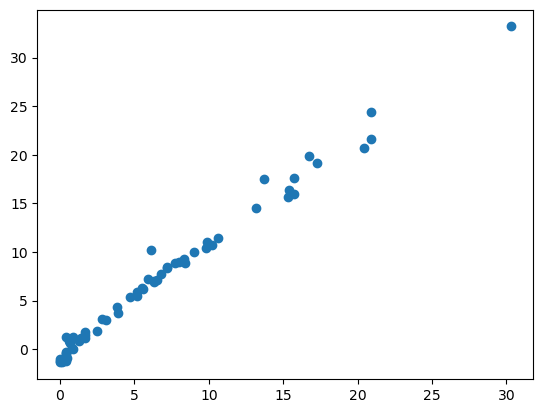

In [60]:
linreg.fit(X_train_scaled,Y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(Y_test,y_pred)

# LASSO


Mean absolute error 0.9605020166901077
R2 Score 0.9692970913627958


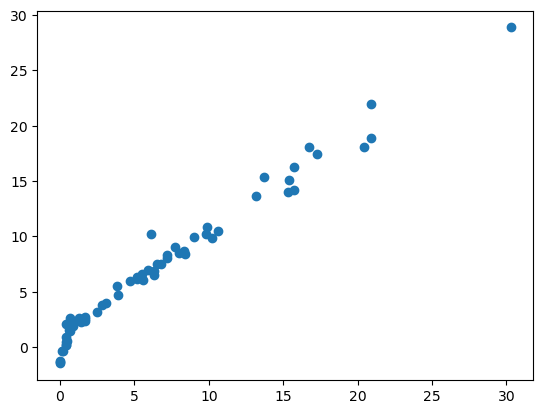

In [61]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,Y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(Y_test,y_pred)

# Ridge Model


Mean absolute error 0.9862070802884412
R2 Score 0.9616458508455312


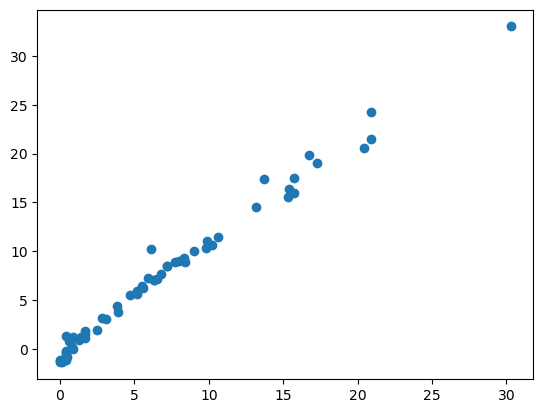

In [63]:
from sklearn.linear_model import Ridge
lidge=Ridge()
lidge.fit(X_train_scaled,Y_train)
y_pred=lidge.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(Y_test,y_pred)